# Decision boundary in Deep Learning (make_moon dataset)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

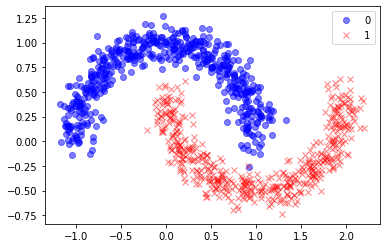

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.show()

In [4]:
X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.03, 
                                                   random_state=42)

## A simple Neural Network

In [7]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(tf.keras.optimizers.Adam(lr=0.05), 'binary_crossentropy', 
             metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [11]:
results = model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 5ms/sample - loss: 0.2219 - acc: 0.9333


In [12]:
results

[0.2218514382839203, 0.93333334]

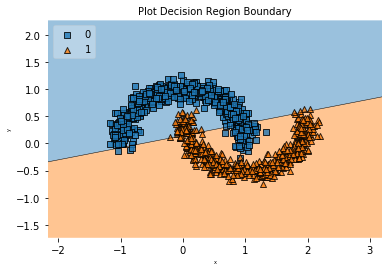

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()

## A multilayer Neural Network

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(tf.keras.optimizers.Adam(lr=0.05), 
              'binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 5ms/sample - loss: 8.2885e-04 - acc: 1.0000


[0.0008288506069220603, 1.0]

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the train set is:\t{:0.3f}".format(
    accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the test set is:\t{:0.3f}".format(
    accuracy_score(y_test, y_test_pred)))

The Accuracy score on the train set is:	0.999
The Accuracy score on the test set is:	1.000


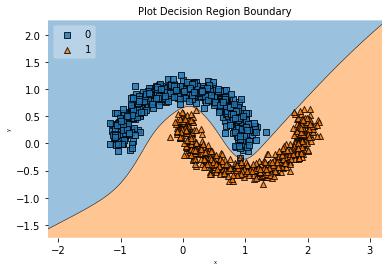

In [20]:
plot_decision_regions(X=X, y=y, clf=model, legend=2)

plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()

***